# Heart Disease Prediction using Logistic Regression

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load dataset
df = pd.read_csv('heart_disease.csv')
df.head()

,Age,Gender,Cholesterol,Blood_Pressure,Heart_Disease
0,68,Male,210,138,0
1,58,Male,197,101,0
2,44,Female,296,150,1
3,72,Female,153,108,0
4,37,Female,184,165,1


In [3]:
# Check for nulls and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

Age               0
Gender            0
Cholesterol       0
Blood_Pressure    0
Heart_Disease     0
dtype: int64
0


In [4]:
# Encode categorical variable
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0

In [5]:
# Feature scaling
scaler = StandardScaler()
df[['Age', 'Cholesterol', 'Blood_Pressure']] = scaler.fit_transform(df[['Age', 'Cholesterol', 'Blood_Pressure']])

In [6]:
# Split features and target
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
# Evaluate model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report with warning suppression
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
 [[11 11]
 [12  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.50      0.49        22
           1       0.35      0.33      0.34        18

    accuracy                           0.42        40
   macro avg       0.42      0.42      0.42        40
weighted avg       0.42      0.42      0.42        40



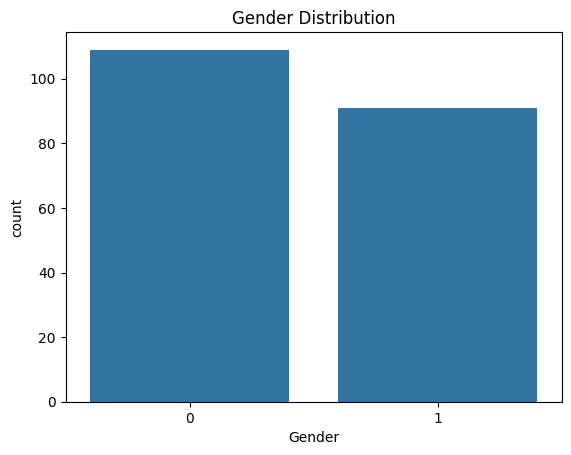

In [10]:
# Gender Distribution
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

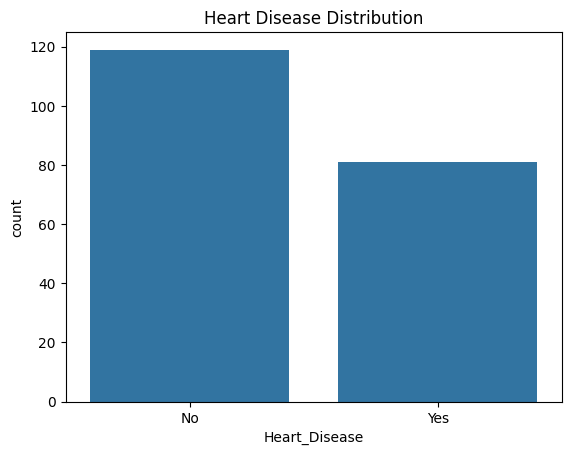

In [11]:
# Heart Disease Outcome Count
sns.countplot(data=df, x='Heart_Disease')
plt.title('Heart Disease Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

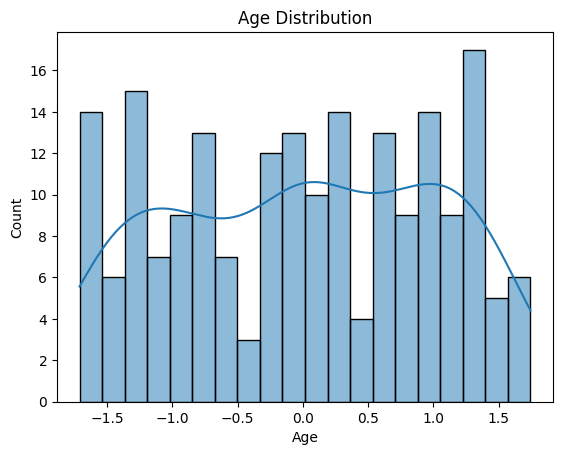

In [12]:
# Age Distribution
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

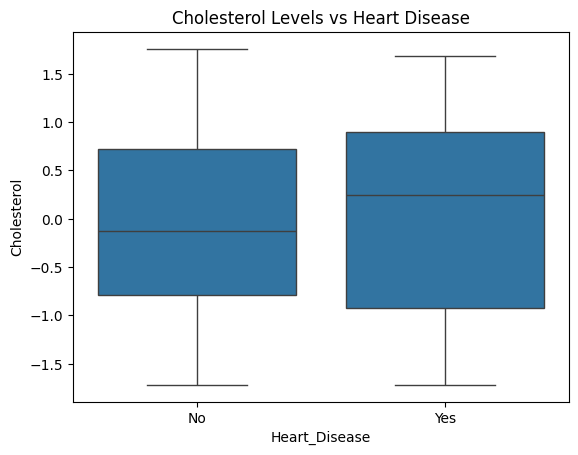

In [13]:
# Cholesterol vs Heart Disease
sns.boxplot(data=df, x='Heart_Disease', y='Cholesterol')
plt.title('Cholesterol Levels vs Heart Disease')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

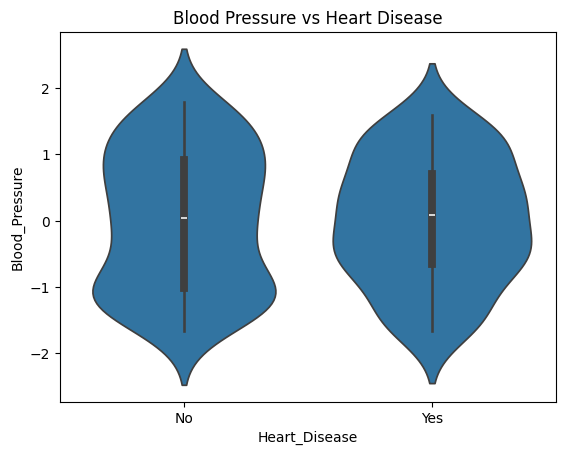

In [14]:
# Blood Pressure vs Heart Disease
sns.violinplot(data=df, x='Heart_Disease', y='Blood_Pressure')
plt.title('Blood Pressure vs Heart Disease')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()